In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm


In [11]:
housing = pd.read_csv('homes.csv')
housing.head()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [3]:
housing.describe()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sell       50 non-null     int64  
 1    "List"    50 non-null     int64  
 2    "Living"  50 non-null     int64  
 3    "Rooms"   50 non-null     int64  
 4    "Beds"    50 non-null     int64  
 5    "Baths"   50 non-null     int64  
 6    "Age"     50 non-null     int64  
 7    "Acres"   50 non-null     float64
 8    "Taxes"   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB


## We can see that there are no null entries in the dataframe. 

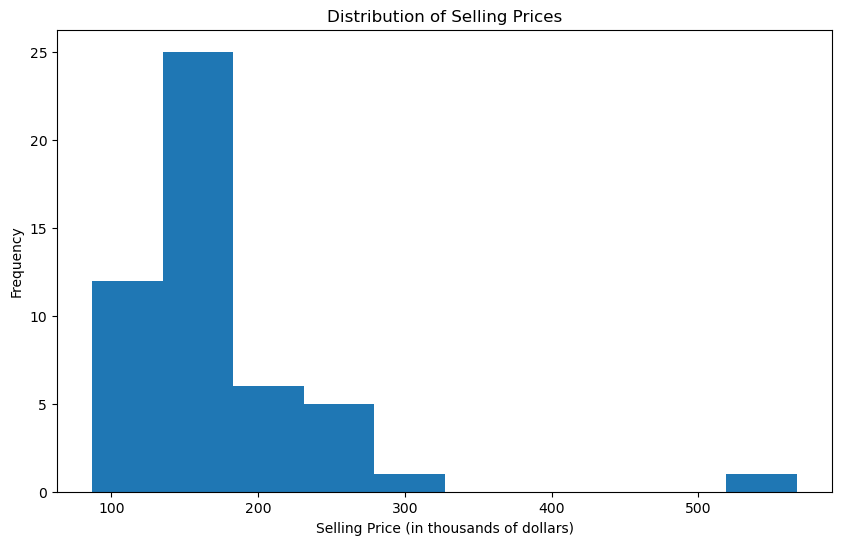

In [17]:
housing.columns = housing.columns.str.strip(' "')

# Histogram
plt.figure(figsize=(10, 6))
housing['Sell'].hist(bins=10)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price (in thousands of dollars)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()




# Histogram of Selling Prices:

## The histogram of selling prices shows the distribution of the Sell column. It appears that most of the homes are sold for a price in the lower range, with fewer homes being sold at higher prices.

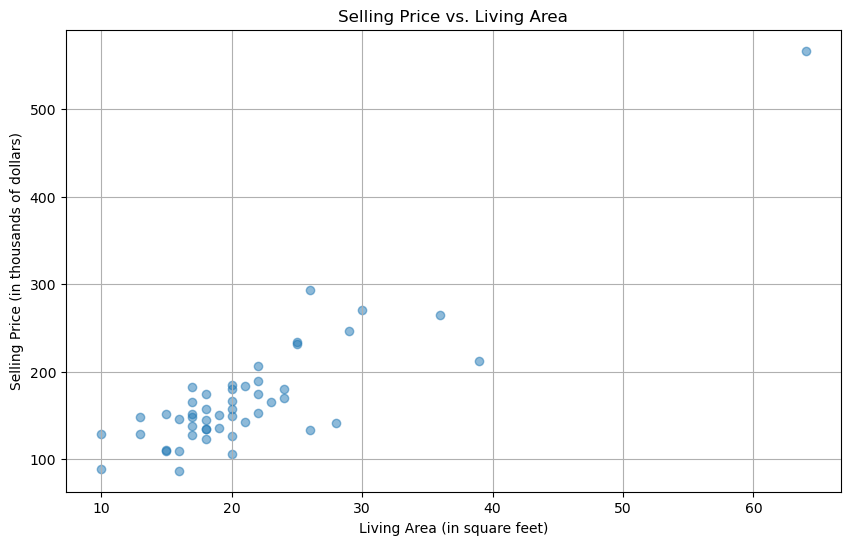

In [18]:
# Scatter plot to visualize the relationship between 'Living' area and 'Sell' price
plt.figure(figsize=(10, 6))
plt.scatter(housing['Living'], housing['Sell'], alpha=0.5)
plt.title('Selling Price vs. Living Area')
plt.xlabel('Living Area (in square feet)')
plt.ylabel('Selling Price (in thousands of dollars)')
plt.grid(True)
plt.show()





# Scatter Plot of Living Area vs. Selling Price:

## The scatter plot between Living area and Sell price indicates a positive relationship, suggesting that as the living area increases, the selling price tends to increase as well.

In [15]:
# Calculate the correlation matrix to see the relationships between all quantitative variables
correlation_matrix = housing.corr()
correlation_matrix

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
Sell,1.000000,0.997433,0.879381,0.560425,0.335113,0.640059,-0.147343,0.168713,0.899339
"""List""",0.997433,1.000000,0.891618,0.570704,0.320470,0.640295,-0.130325,0.166838,0.906636
"""Living""",0.879381,0.891618,1.000000,0.750933,0.467277,0.668437,0.125075,0.177488,0.810243
"""Rooms""",0.560425,0.570704,0.750933,1.000000,0.656557,0.555187,0.371237,0.282448,0.516593
"""Beds""",0.335113,0.320470,0.467277,0.656557,1.000000,0.458682,0.141205,0.036832,0.313638
"""Baths""",0.640059,0.640295,0.668437,0.555187,0.458682,1.000000,-0.023063,0.301119,0.582622
"""Age""",-0.147343,-0.130325,0.125075,0.371237,0.141205,-0.023063,1.000000,0.303733,-0.189221
"""Acres""",0.168713,0.166838,0.177488,0.282448,0.036832,0.301119,0.303733,1.000000,0.059647
"""Taxes""",0.899339,0.906636,0.810243,0.516593,0.313638,0.582622,-0.189221,0.059647,1.000000


The correlation matrix provides insights into the relationship between different numerical variables of the dataset. We can observe strong correlations between:
Sell and List (0.997), which is expected as they both relate to the property's price.
Sell and Living (0.879), indicating that larger living areas tend to correlate with higher selling prices.
Sell and Taxes (0.899), suggesting that properties with higher taxes are generally sold for higher prices.

In [20]:
#5
import statsmodels.api as sm

# Define the independent variable (X) and dependent variable (y)
X = housing['Taxes']
y = housing['Sell']

# Add a constant to the independent variable to include the intercept in the regression
X_with_constant = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_constant).fit()

# Get the summary of the regression
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           7.22e-19
Time:                        21:21:13   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.155      -6.635      40.378
Taxes          0.0414      0.003     14.250      0.000       0.036       0.047
==============================================================================
Omnibus:                       28.767   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.574
Skew:                           1.690   Prob(JB):                     1.16e-13
Kurtosis:                       7.144   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 6

## R-squared: The R-squared value is 0.809, which means that approximately 80.9% of the variation in the selling price can be explained by the taxes on the property. This is a relatively high R-squared value, suggesting a strong model fit to the data.

## Adjusted R-squared: The adjusted R-squared is 0.805, which takes into account the number of predictors in the model and is a more accurate measure when comparing models with a different number of independent variables.

## P-value: The p-value for Taxes is 0.000(less than 5% alpha), which indicates that Taxes is a statistically significant predictor for the Sell price.

## Confidence Interval: The 95% confidence interval for the Taxes coefficient is between 0.036 and 0.047, suggesting that we can be 95% confident that the true coefficient lies within this range.

## The regression results suggest that Taxes are indeed a good predictor for selling price, given the high R-squared value and the statistical significance of the Taxes coefficient


# 7
## Using living as the independent variable this time and comparing it to the previous model


In [21]:
# Define the independent variable (X) and dependent variable (y)
X = housing['Living']
y = housing['Sell']

# Add a constant to the independent variable to include the intercept in the regression
X_with_constant = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_constant).fit()

# Get the summary of the regression
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     163.7
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           4.39e-17
Time:                        21:28:26   Log-Likelihood:                -247.69
No. Observations:                  50   AIC:                             499.4
Df Residuals:                      48   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5531     13.579      0.630      0.532     -18.749      35.856
Living         7.6613      0.599     12.796      0.000       6.458       8.865
==============================================================================
Omnibus:                        3.798   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                2.793
Skew:                          -0.399   Prob(JB):                        0.247
Kurtosis:                       3.838   Cond. No.                         62.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## R-squared: The R-squared value is 0.773, indicating that around 77.3% of the variability in the selling price is explained by the living area of the home. This is slightly less than the model using Taxes as the independent variable.

## Adjusted R-squared: The adjusted R-squared value is 0.769, which accounts for the number of predictors in the model and is slightly lower than that of the Taxes model.

## The p-value for the Living coefficient is very close to 0, indicating that it is a statistically significant predictor for the Sell price.

## Confidence Interval: The 95% confidence interval for the Living coefficient ranges from 6.458 to 8.865, which is fairly narrow and suggests precision in the estimate of the effect of living area on selling price.

## Comparing both models, the one with Taxes as the independent variable has a higher R-squared, which means it explains a higher percentage of the variance in the selling price. However, the model with Living as the independent variable has better normality of residuals based on the Omnibus and Jarque-Bera tests.

## As for limitations, while both models provide significant predictors for selling price, they likely do not capture all factors that influence housing prices, such as location, market conditions, or home features beyond living area and taxes. Additionally, linear regression assumes a linear relationship, which may not fully capture the complexities of real-world data.